In [1]:
#library imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
#Load dataset
data=pd.read_csv("California_Houses.csv")
X = data.drop('Median_House_Value', axis=1)
T= data['Median_House_Value']

#Split dataset
X_train, X_temp, Y_train, Y_temp = train_test_split(
    X, T, test_size=0.30, random_state=42
)

X_test, X_val, Y_test, Y_val = train_test_split(
    X_temp, Y_temp, test_size=0.5, random_state=42
)
len(X_train)

14448

In [3]:
print("Training set:", len(X_train))
print("Validation set:", len(X_val))
print("Test set:", len(X_test))
print("Total:", len(X_train) + len(X_val) + len(X_test))

Training set: 14448
Validation set: 3096
Test set: 3096
Total: 20640


### steps of the algorithm
- Scaling - Used StandardScaler because the features have very different scales (income vs latitude, etc.)
- Hyperparameter tuning - I tried different alpha values from 0.0001 to 10 using a log scale. Found the best one using validation set.
-  The actual coordinate descent - algorithm:
   - Starts with some initial coefficients
   - For each feature, it updates just that coefficient while keeping others fixed
   - Keeps iterating until convergence (or max iterations)
   - The L1 penalty term makes some coefficients shrink to exactly zero
### Key Parameters:

- `alpha`: The regularization strength (tuned using validation set)
- `max_iter`: Set to 5000 to make sure it converges
- `tol`: Convergence tolerance of 1e-4
- `fit_intercept`: Used True during hyperparameter tuning to give the model more flexibility when finding the best alpha value, but set to False for the final model since the scaled data doesn't need an additional intercept term and it makes the model more efficient.

Final Test MSE: 48308633688.35334
Final Test MAE: 208467.5897173787


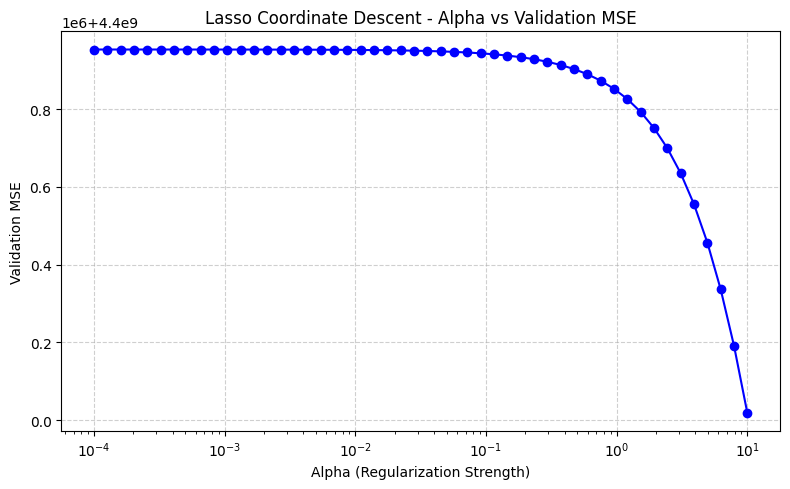

In [4]:
#Coordinate Descent
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso , LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score 

#Scale needed data sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#Tune to get best alpha
alphas = np.logspace(-4, 1, 50)
best_alpha = None
best_val_mse = float('inf')
val_mse_scores = []  # Store MSE values for plotting

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=5000, tol=1e-4, fit_intercept=True)
    lasso.fit(X_train_scaled, Y_train)
    y_val_pred = lasso.predict(X_val_scaled)
    val_mse = mean_squared_error(Y_val, y_val_pred)
    val_mse_scores.append(val_mse)  # Store MSE for this alpha
    
    if val_mse < best_val_mse:
        best_val_mse = val_mse
        best_alpha = a
#Train model using best alpha
lasso_final = Lasso(alpha=best_alpha, max_iter=5000, tol=1e-4, fit_intercept=False)
lasso_final.fit(X_train_scaled, Y_train)

#Evaluate on tests set
y_test_pred = lasso_final.predict(X_test_scaled)
test_mse = mean_squared_error(Y_test, y_test_pred)
test_mae = mean_absolute_error(Y_test, y_test_pred)

print("Final Test MSE:", test_mse)
print("Final Test MAE:", test_mae)

#Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(alphas, val_mse_scores, marker='o', linestyle='-', color='blue')
plt.xscale('log')  # use log scale for alpha values
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Validation MSE")
plt.title("Lasso Coordinate Descent - Alpha vs Validation MSE")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()





### Results

The model ended up with:

- Test MSE: 48,308,633,688
- Test MAE: 208,467